Basic importing of requisite libraries and data files. A scatter plot of profit vs population with marker * is plotted.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data = 'ex1data1.txt'
x, y = np.loadtxt(data, delimiter=',', usecols=(0, 1), unpack=True)
#fc = []   # first column data
#sc = [] # second column data
#i=0
#for line in fp:
    #units = line.split(',')
    #fc.append(units[0])
    #sc.append(units[1])
    
plt.scatter(x,y, s=40, c='b', marker='*')
plt.ylabel('Profit')
plt.xlabel('Population')



Text(0.5,0,'Population')

To take into account the intercept term, we add an additional first column to x and set it to all ones.

In [3]:
X = np.ones((len(x), 2))
X[:,1] = x

Initializing intercept term  to zero.

In [8]:
theta = np.zeros(2)

In [74]:
iterations = 15000
alpha = 0.02


 [numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) does the dot product of two arrays.
A computecost function is defined will return the cost.

In [62]:
def computeCost(X, y, theta):
    m = len(y)
    return np.dot((np.dot(X, theta) - y), (np.dot(X, theta) - y)) / (2 * m)


Here a simple linear regression function is defined which updates based on cost function of gradient descent.

In [52]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    cost = np.zeros(iterations)
    thetaMod = theta.copy()
    thetaHist = np.zeros(iterations)
    
    for i in range(iterations):
        thetaMod = thetaMod - np.dot(X.T, (np.dot(X, thetaMod) - y)) * alpha / m
        thetaHist[i] = thetaMod[1]        
        cost[i] = computeCost(X, y, thetaMod)
        
    return thetaMod, thetaHist, cost


In [75]:
gradient, thetaHist, cost = gradientDescent(X, y, theta, alpha, iterations)  
gradient

array([-3.89578088,  1.19303364])

Plotting the cost per iteration. The cost value never increases, as it is expected.

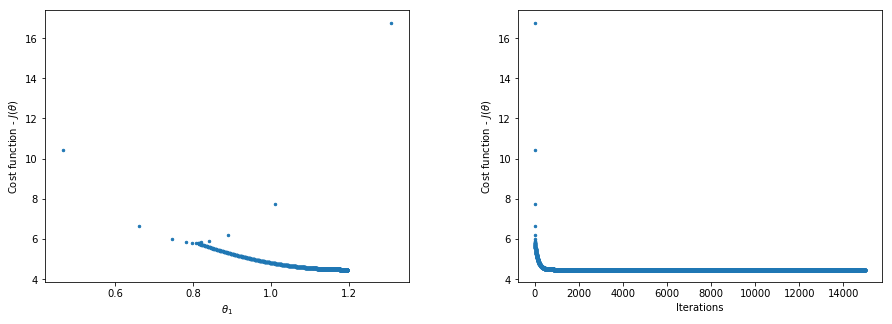

In [76]:
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Minimization path:
ax1.scatter(thetaHist, cost,  marker='o', s=6)
ax1.set_xlabel(r'$\theta_1$')
ax1.set_ylabel(r"Cost function - $J(\theta)$");

# Cost-Iterations plot:
ax2.scatter(np.arange(iterations), cost,  marker='o', s=6)
ax2.set_xlabel("Iterations")
ax2.set_ylabel(r"Cost function - $J(\theta)$");

For the sake of representationthe linear fit graph along with scatter plot is shown.

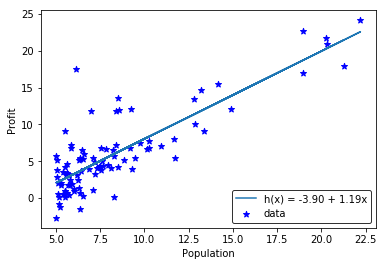

In [70]:
def linearFit(value):
    return gradient[0] + gradient[1] * value

plt.scatter(X[:,1], y, marker='*', c='b', s=40, label='data')
plt.plot(X[:, 1], linearFit(X[:, 1]), label='h(x) = %0.2f + %0.2fx'%(gradient[0], gradient[1]))
plt.xlabel("Population")
plt.ylabel("Profit")
pst = plt.legend(loc='lower right', frameon=True)
pst.get_frame().set_edgecolor('k');